In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [337]:
with open('train.csv') as f:
   df = pd.read_csv(f, dtype={'Age': np.float64})

In [338]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

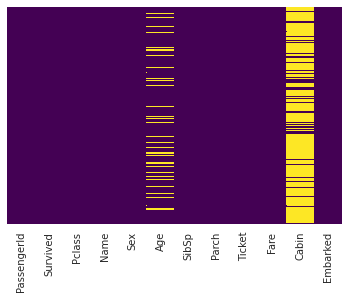

In [339]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

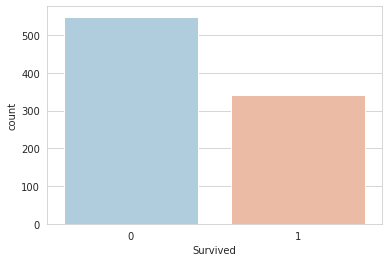

In [341]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='RdBu_r')

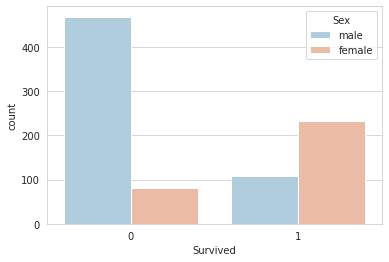

In [342]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

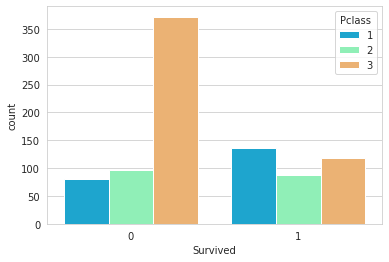

In [343]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

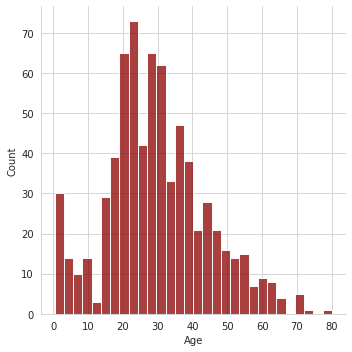

In [344]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=30)

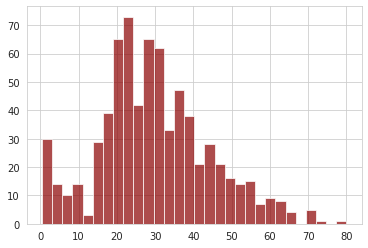

In [345]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

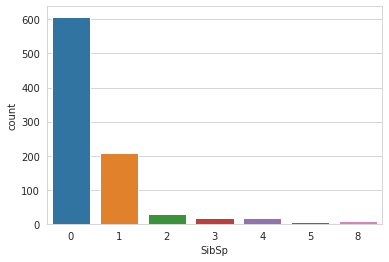

In [347]:
sns.countplot(x='SibSp',data=df)

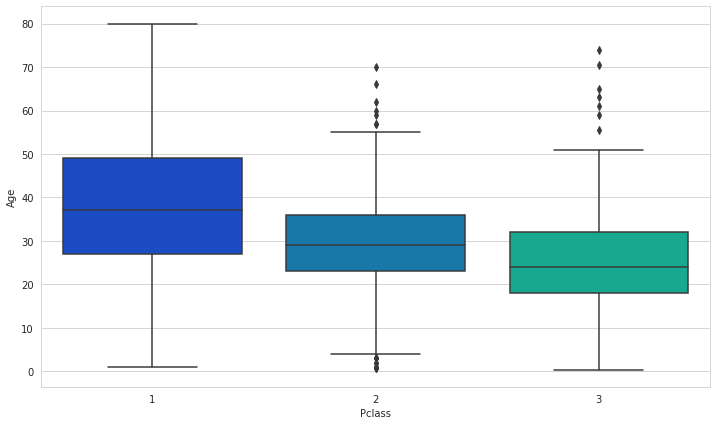

In [348]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [349]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [350]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

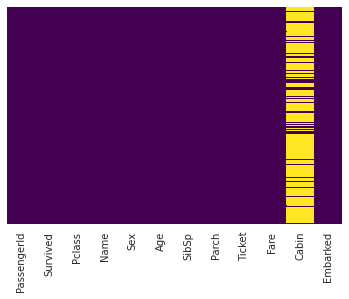

In [351]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [353]:
df.drop('Cabin',axis=1,inplace=True)

In [354]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [355]:
df.dropna(inplace=True)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [357]:
sex = pd.get_dummies(df['Sex'],drop_first=False)
embark = pd.get_dummies(df['Embarked'],drop_first=False)

In [358]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [359]:
df = pd.concat([df,sex,embark],axis=1)

In [360]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [361]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [362]:
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


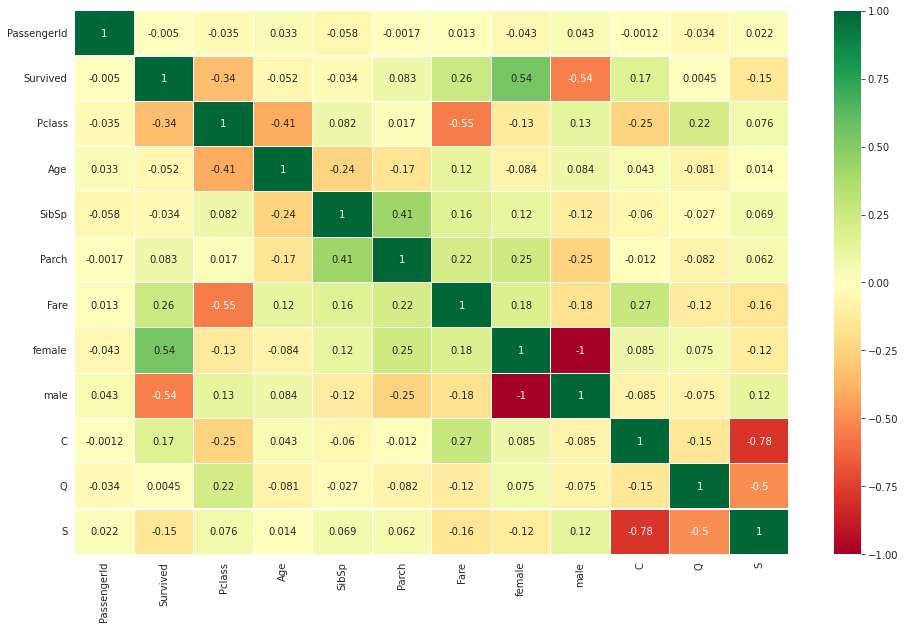

In [363]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Pclass',axis=1), df['Survived'], test_size=0.30, random_state=101)

In [365]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter= 5000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [366]:
predictions = logmodel.predict(X_test)

In [367]:
logmodel.score(X_test,y_test)

1.0

In [378]:
with open('titanic.csv') as f:
    df2 = pd.read_csv(f, dtype={'Age': np.float64})

In [379]:
cols = {}
for col in df.columns:
    cols[col] = col.title()
df2 = df2.rename(columns=cols)

In [381]:
df2['embarked'] = df2.Embarked.fillna('S')
df2['Age'] = df2.age.fillna(df.Age.median())

In [387]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df2['age_binned'] = pd.cut(df2.age, bins, right=True, include_lowest=False)
df2['Child'] = (df2.age < 16).astype(int)
surv = df2[df2.survived == 1]

Text(0, 0.5, '')

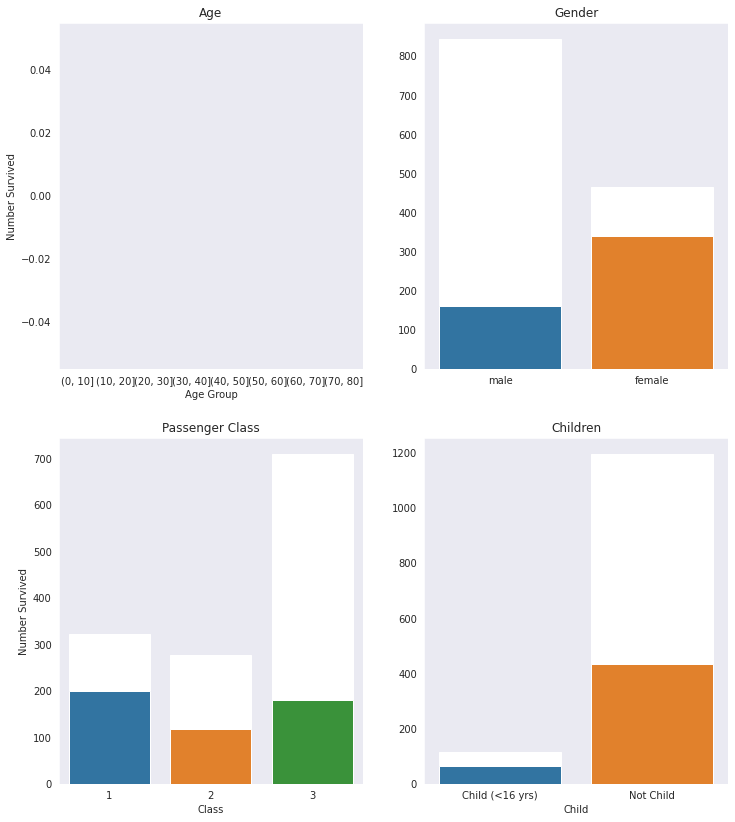

In [392]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

sns.countplot(x='age_binned', color='white', ax=ax1, data=df, order=order)
sns.countplot(x='age_binned', ax=ax1, data=surv, order=order)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')


sns.set_style('dark')
sns.countplot(x='sex', color='white', ax=ax2, data=df2, order=['male','female'])
sns.countplot(x='sex', ax=ax2, data=surv,  order=['male','female'])
plt.ylabel('Survived')
ax2.set_xlabel('')
ax2.set_title('Gender')
ax2.set_ylabel('')

sns.countplot(x='pclass', color='white', ax=ax3, data=df2,  order=[1, 2, 3])
sns.countplot(x='pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('Class')


sns.countplot(x='Child', color='white', ax=ax4, data=df2, order=[1,0])
sns.countplot(x='Child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')

In [385]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      1309 non-null   int64   
 1   survived    1309 non-null   int64   
 2   name        1309 non-null   object  
 3   sex         1309 non-null   object  
 4   age         1046 non-null   float64 
 5   sibsp       1309 non-null   int64   
 6   parch       1309 non-null   int64   
 7   ticket      1309 non-null   object  
 8   fare        1308 non-null   float64 
 9   cabin       295 non-null    object  
 10  Embarked    1307 non-null   object  
 11  boat        486 non-null    object  
 12  body        121 non-null    float64 
 13  home.dest   745 non-null    object  
 14  embarked    1309 non-null   object  
 15  Age         1309 non-null   float64 
 16  age_binned  1309 non-null   category
 17  Child       1309 non-null   int64   
dtypes: category(1), float64(4), int64(5), object(8)


Text(0.5, 0, '')

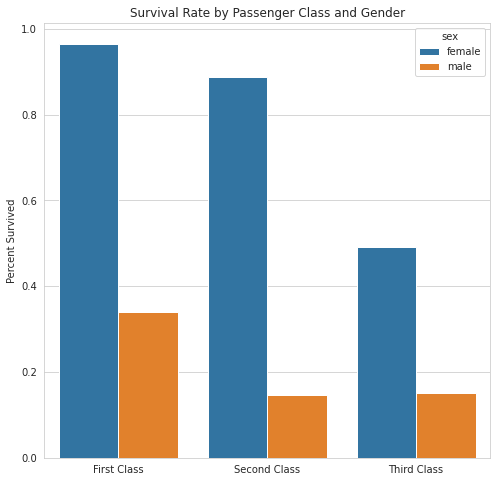

In [393]:
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='pclass', y='survived', hue='sex', data=df2, ax=axis, ci=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')